In [1]:
import psycopg2

conn = psycopg2.connect(database="world", user="postgres", password="postgres", host="localhost", port=5432)

import pandas as pd

import numpy as np

from IPython.core.display import display

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
def load_data():
    """Загрузка данных из базы."""
    with conn.cursor() as cur:
        cur.execute(
            "SELECT c.name, cl.language "
            "FROM country c "
            "JOIN countrylanguage cl ON c.code = cl.countrycode"
        )
        rows = cur.fetchall()
    return rows

data_language = load_data()

In [3]:
# Создадим DataFrame
dt_language = pd.DataFrame(data=data_language, columns=['Country name', 'Language'], index=np.arange(len(data_language)))
display(dt_language)

,Country name,Language
0,Afghanistan,Pashto
1,Netherlands,Dutch
2,Netherlands Antilles,Papiamento
3,Albania,Albaniana
4,Algeria,Arabic
...,...,...
979,India,Asami
980,Canada,Eskimo Languages
981,China,Dong
982,Russian Federation,Belorussian


In [4]:
# Выведем топ_10 самых популярных языков в мире
dt_language_counted = dt_language.groupby('Language').count()
top10_languages = dt_language_counted.sort_values(by='Country name', ascending=False)[:10]
top10_languages


,Country name
Language,
English,60
Arabic,33
Spanish,28
French,25
Chinese,19
German,19
Russian,17
Italian,15
Creole English,14


In [5]:
# Посчитаем долю использования каждого языка в мире
share_top10 = (top10_languages.div(dt_language_counted.sum())) * 100
share_top10.sort_values(by='Country name', ascending=False)

,Country name
Language,
English,6.097561
Arabic,3.353659
Spanish,2.845528
French,2.540650
Chinese,1.930894
German,1.930894
Russian,1.727642
Italian,1.524390
Creole English,1.422764


array([<AxesSubplot:ylabel='Country name'>], dtype=object)

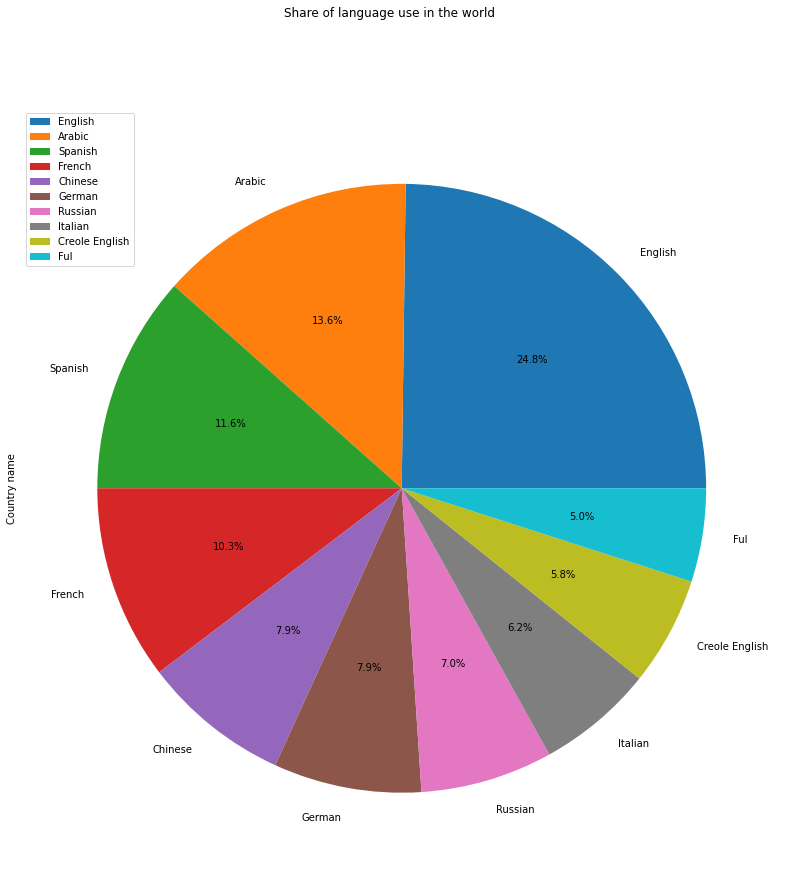

In [14]:
# Построим  круговую диаграмму
share_top10.plot.pie(figsize=(14, 14), subplots=True, title='Share of language use in the world', legend='best', autopct='%1.1f%%')
